# A Collection of Tutorials found at the Altair Data Vizualization Python package's home page

All code in this notebook is from Altair's website https://altair-viz.github.io/ or a variation of it

## Altair Installation Verification Tutorial
https://altair-viz.github.io/getting_started/installation.html#installation-notebook

In [1]:
import altair
from vega_datasets import data

# Run this once per session, enables Altair rendering
altair.renderers.enable("notebook")

RendererRegistry.enable('notebook')

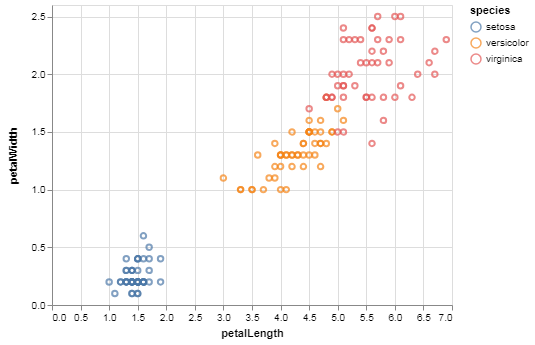

In [2]:
iris = data.iris()

altair.Chart(iris).mark_point().encode(
    x = "petalLength",
    y = "petalWidth",
    color = "species"
)

## Altair Basic Statistical Visualization Tutorial
My progression through the basic tutorial for altair provided on their site at:
https://altair-viz.github.io/getting_started/starting.html

In [3]:
import pandas
import altair

# Specify data in a pandas dataframe, common method for using datasets
data = pandas.DataFrame({"a" : list("AAANNNSSSPPP"), "b" : [2, 7, 4, 1, 2, 6, 8, 4, 7, 9, 3, 5]})

# Charts are fundamental Altair objects that take a dataframe as argument
chart = altair.Chart(data)

# Specifying markings on the chart done using the Chart.mark_* functions
chart.mark_point()

Shows all points on top of each other as they have not been separated

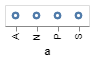

In [4]:
# Separating points through "encoding channels", data separated by one attribute
chart.mark_point().encode(x = "a")

Data has been separated by one attribute into four categories, each category still has overlapping points however.

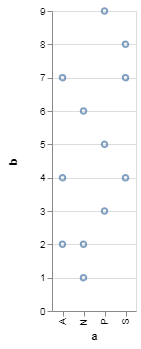

In [5]:
# Data separated by two attributes
chart.mark_point().encode(x = "a", y = "b")

Data separated by two attributes

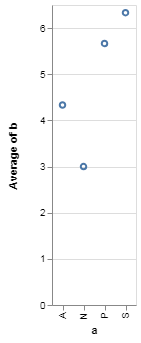

In [6]:
# Showing an aggregation of the data
chart.mark_point().encode(x = "a", y = "average(b)")

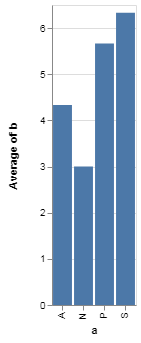

In [7]:
# In bar chart form:
chart.mark_bar().encode(x = "a", y = "average(b)")

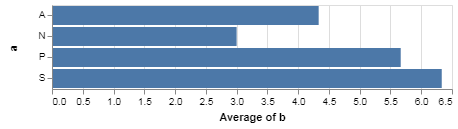

In [8]:
# Swap axis
chart.mark_bar().encode(y = "a", x = "average(b)")

#### Converting charts to JSON

In [9]:
chart = altair.Chart(data).mark_bar().encode(x = "a", y = "average(b)")
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.4.1.json",
  "config": {
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "values": [
      {
        "a": "A",
        "b": 2
      },
      {
        "a": "A",
        "b": 7
      },
      {
        "a": "A",
        "b": 4
      },
      {
        "a": "N",
        "b": 1
      },
      {
        "a": "N",
        "b": 2
      },
      {
        "a": "N",
        "b": 6
      },
      {
        "a": "S",
        "b": 8
      },
      {
        "a": "S",
        "b": 4
      },
      {
        "a": "S",
        "b": 7
      },
      {
        "a": "P",
        "b": 9
      },
      {
        "a": "P",
        "b": 3
      },
      {
        "a": "P",
        "b": 5
      }
    ]
  },
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


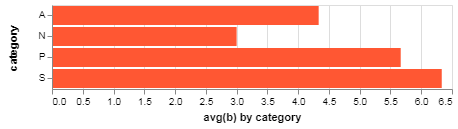

In [10]:
# Customizing visualizations
altair.Chart(data).mark_bar(color='#FF5733').encode(
    altair.Y('a', axis=altair.Axis(title='category')),
    altair.X('average(b)', axis=altair.Axis(title='avg(b) by category'))
)

#### Scatter Matrix plot from Altair Example Gallery: https://altair-viz.github.io/gallery/scatter_matrix.html

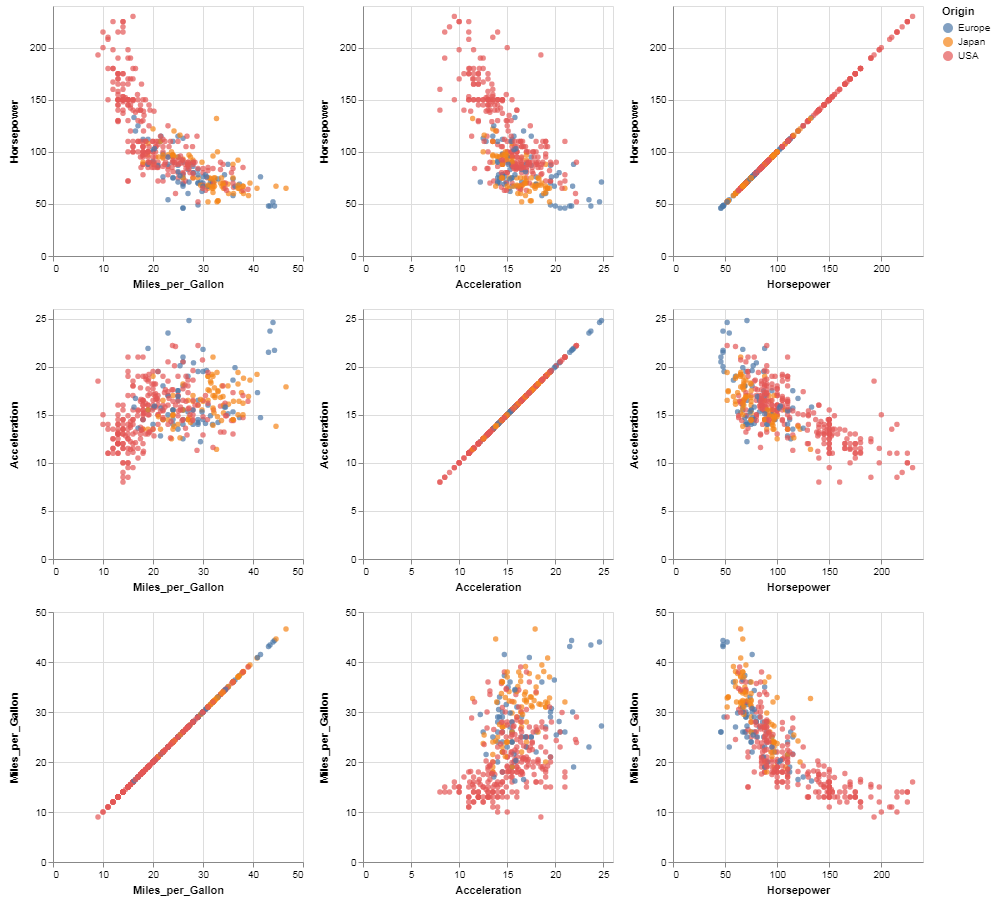

In [11]:
import altair as alt
from vega_datasets import data

alt.Chart(data.cars.url).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=250,
    height=250
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()

#### Altair Tutorial: Exploring Seattles weather from https://altair-viz.github.io/case_studies/exploring-weather.html

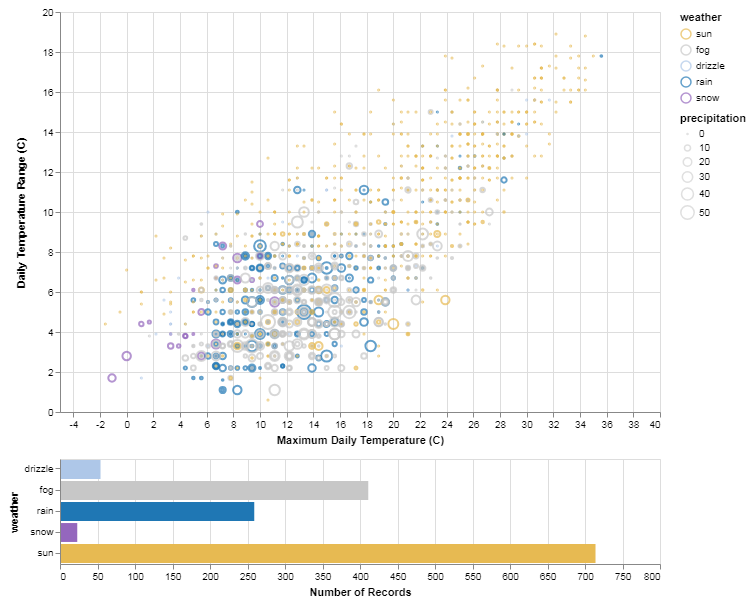

In [13]:
import altair as alt
from vega_datasets import data

df = data.seattle_weather()

scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])

brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    alt.X('temp_max:Q', axis=alt.Axis(title='Maximum Daily Temperature (C)')),
    alt.Y('temp_range:Q', axis=alt.Axis(title='Daily Temperature Range (C)')),
    color=alt.condition(brush, 'weather:N', alt.value('lightgray'), scale=scale),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[1, 200]))
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=600,
    height=400,
    selection=brush
)

bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.Color('weather:N', scale=scale),
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush.ref()
).properties(
    width=600
)

alt.vconcat(points, bars, data=df)